## Latar Belakang

Departemen Kepolisian Boston (BPD) melaporkan bahwa banyaknya laporan insiden kajahatan baru dan telah mendokumentasikan rincian awal seputar insiden yang telah ditanggapi. BPD sudah memiliki kumpulan data kejahatan dan mereka ingin menganalisa apa saja yang harus di tingkatkan agar dapat mengurangi tindak kriminal dan menangkap pelaku kejahatan tersebut.

## Pernyataan Masalah

BPD ingin mengetahui kejahatan apa saja yang sering terjadi berdasarkan data yang telah mereka kumpulkan. Informasi ini akan membantu BPD untuk menangkap dan meminimalisir terjadinya kejahatan.
Dari info diatas, saya akan membantu menjawab pertanyaan:<br>
- Kejahatan apa saja yang sering terjadi?
- Dimana kejahatan paling mungkin terjadi?
- Apakah frekuensi kejahatan berbuah seiring waktu?


## Data

Sebelum melakukan data analysis, kita dapat melihat data yang dimiliki terlebih dahulu. Dataset dapat diakses [disini]('https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston').

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [311]:
# encoding='latin1'
df = pd.read_csv('crime.csv', encoding= 'latin1')
display(df.head(),df.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


Dataset berisi kumpulan data seputar insiden kejahatan terkait tanggal kejadian, lokasi dan informasi lainnya. Berikut kolom yang ada didalam data set:
- `INCIDENT_NUMBER`: Nomor unik untuk tiap insiden kejahatan
- `OFFENSE_CODE`: Kode unik untuk tiap kategori kejahatan pada kolom OFFENSE_CODE_GROUP
- `OFFENSE_CODE_GROUP`: Group untuk kode kejahatan
- `OFFENSE_DESCRIPTION`: Deskripsi kejahatan
- `DISTRICT`: Area terjadinya kejahatan (berupa kode)
- `REPORTING_AREA`: Area pelaporan
- `SHOOTING`: Penembakan, apakah ada penembakan dalam insiden tersebut?
- `OCCURRED_ON_DATE`: Tanggal terjadinya insiden
- `YEAR`: Tahun saat terjadinya insiden
- `MONTH`: Bulan saat terjadinya insiden
- `DAY_OF_WEEK`: Hari terjadinya insiden
- `HOUR`: Jam saat terjadinya insiden
- `UCR_PART`: Uniform Crime Reporting, kategori kejahatan yang diterbitkan oleh FBI
- `STREET`: Nama jalan di lokasi terjadinya insiden
- `Lat` : Latitude dari lokasi insiden
- `Long`: Longtitude dari lokasi insiden
- `Location`: Titik lokasi insiden berisi latitude dan longtitude


### Data Understanding and Cleaning

Sebelum menganalisa, kita harus cek dataset yang kita miliki dalam tahapan *data understanding*. Pada proses tersebut, kita akan tahu apakah ada data anomali dan apakah ada data kosong pada dataset ini? Pertama kita perlu tangani data-data yang tidak sesuai dengan tahap *data cleaning*. <br>
Berikut pengecekan dataset yang akan dilakukan:

In [312]:
# Kita menggunakan dataframe baru dari hasil copy data frame 
df_new = df.copy()
df_new

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [313]:
df_new.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [314]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_new.shape}')
df_new.info()

Jumlah baris dan kolom di dataset df adalah (319073, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat        

In [315]:
display(df_new.describe(), df_new.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


In [316]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df_new.columns :
    listItem.append( [col, df_new[col].nunique(), df_new[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, I182070908, I182070906, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070889, I182070888, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070866, I182070865, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070839, I182070838, I182070837, I182070836, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070820, I182070819, I182070818, ...]"
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3006, 3305, 614, 3801, 3803, 522, 3831, 802, 2007, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 1843, 3125, 1841, 3802, 3018, 2405, 617, 3625, 3106, 3501, 3115, 616, 3807, 1102, 1849, 2905, 1810, 1842, 1806, 1848, 1844, 423, 3205, 413, 1501, 3001, 3830, 561, 2914, 2610, 1109, 706, 2403, 3160, 900, 801, 3002, 520, 2648, 670, 615, 3116, 1504, 1830, 361, 2006, 311, 1001, 3810, 2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112, 3502, 735, 612, 560, 381, 3402, 1815, 1107, 2101, 1106, 3202, 1503, ...]"
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Medical Assistance, Assembly or Gathering Violations, Larceny From Motor Vehicle, Residential Burglary, Simple Assault, Restraining Order Violations, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Drug Violation, Warrant Arrests, Disorderly Conduct, Property Related Damage, Missing Person Reported, Investigate Person, Fraud, Aggravated Assault, License Plate Related Incidents, Firearm Violations, Other Burglary, Arson, Bomb Hoax, Harbor Related Incidents, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Missing Person Located, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Search Warrants, License Violation, Commercial Burglary, HOME INVASION, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Evading Fare, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Criminal Harassment, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, Gambling, INVESTIGATE PERSON, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY, AUTO THEFT, VERBAL DISPUTE, ROBBERY - STREET, FIRE REPORT - HOUSE, BUILDING, ETC., THREATS TO DO BODILY HARM, PROPERTY - LOST, SICK/INJURED/MEDICAL - PERSON, DEMONSTRATIONS/RIOT, LARCENY THEFT FROM MV - NON-ACCESSORY, M/V ACCIDENT - OTHER, M/V ACCIDENT - PERSONAL INJURY, BURGLARY - RESIDENTIAL - NO FORCE, M/V - LEAVING SCENE - PROPERTY DAMAGE, ASSAULT SIMPLE - BATTERY, VIOL. OF RESTRAINING ORDER W NO ARREST, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP., HARASSMENT, BALLISTICS EVIDENCE/FOUND, PROPERTY - FOUND, LARCENY SHOPLIFTING, SERVICE TO OTHER PD INSIDE OF MA., FIRE REPORT/ALARM - FALSE, DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP, WARRANT

#### INCIDENT_NUMBER

Kita cek data pada kolom `INCIDENT_NUMBER` apakah ada anomali data?<br>
Sesuai data bahwa baris hanya ada 319073 sedangkan data unique pada `INCIDENT_NUMBER` ada sebanyak 282517. Ini berati ada data double dan kita akan cek terlebih dahulu.

In [317]:
df_new['INCIDENT_NUMBER'].describe()

count     319073    
unique    282517    
top       I162030584
freq      13        
Name: INCIDENT_NUMBER, dtype: object

In [318]:
# Cek data double
data_double = df_new['INCIDENT_NUMBER'].value_counts()
data_double[data_double > 1]

I162030584    13
I152080623    11
I172013170    10
I182065208    10
I172096394    10
              ..
I172092811    2 
I162104383    2 
I172092516    2 
I172000757    2 
I152050796    2 
Name: INCIDENT_NUMBER, Length: 27523, dtype: int64

In [319]:
# Tampilkan data dengan INCIDENT_NUMBER yang sama

duplicate_incident = df_new['INCIDENT_NUMBER']
data_duplicate = df_new[duplicate_incident.isin(duplicate_incident[duplicate_incident.duplicated()])].sort_values('INCIDENT_NUMBER')
data_duplicate

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319066,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319067,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319064,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
28,I182070904,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,242,NaN,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)"


In [320]:
# Cek salah satu data yang memiliki INCIDENT_NUMBER sama yaitu sebanyak 13 data

df_new[df_new['INCIDENT_NUMBER'] == 'I162030584']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
237660,I162030584,423,Aggravated Assault,ASSAULT - AGGRAVATED,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part One,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237661,I162030584,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237662,I162030584,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237663,I162030584,1504,Other,WEAPON - OTHER - OTHER VIOLATION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237664,I162030584,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237665,I162030584,2010,HOME INVASION,HOME INVASION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,NaN,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237666,I162030584,371,Robbery,ROBBERY - HOME INVASION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part One,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237667,I162030584,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237668,I162030584,1300,Recovered Stolen Property,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237669,I162030584,1510,Firearm Violations,WEAPON - FIREARM - OTHER VIOLATION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"


In [321]:
df_new['INCIDENT_NUMBER'].isnull().sum()

0

Dari data diatas dapat diketahui bahwa `INCIDENT_NUMBER` sama dikarenakan memiliki waktu (kolom OCCURED_ON_DATE) kejadian yang sama atau bebarengan dan juga tempat serta area pelaporan kejadian yang sama (kolom DISTRICT dan REPORTING_AREA), namun kejahatan yang dilakukan berbeda pada kolom OFFENSE_CODE_GROUP dan	OFFENSE_DESCRIPTION. Pada kolom ini juga tidak memiliki missing value.

#### OFFENSE_CODE

Cek data pada kolom `OFFENSE_CODE`

In [322]:
df_new['OFFENSE_CODE'].value_counts()

3006    18783
3115    18754
3831    16323
1402    15154
802     14799
        ...  
404     1    
112     1    
2609    1    
2606    1    
1864    1    
Name: OFFENSE_CODE, Length: 222, dtype: int64

In [323]:
df_new['OFFENSE_CODE'].isnull().sum()

0

In [324]:
df_new['OFFENSE_CODE'].nunique()

222

In [325]:
df_new['OFFENSE_CODE'].unique()

array([ 619, 1402, 3410, 3114, 3820,  724, 3301,  301, 3108, 2647, 3201,
       3006, 3305,  614, 3801, 3803,  522, 3831,  802, 2007, 2900, 2907,
       2629, 2662, 3207,  613, 3109, 2612, 1843, 3125, 1841, 3802, 3018,
       2405,  617, 3625, 3106, 3501, 3115,  616, 3807, 1102, 1849, 2905,
       1810, 1842, 1806, 1848, 1844,  423, 3205,  413, 1501, 3001, 3830,
        561, 2914, 2610, 1109,  706, 2403, 3160,  900,  801, 3002,  520,
       2648,  670,  615, 3116, 1504, 1830,  361, 2006,  311, 1001, 3810,
       2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112,
       3502,  735,  612,  560,  381, 3402, 1815, 1107, 2101, 1106, 3202,
       1503, 1846, 3016, 3304,  611, 2622, 3130, 2407, 2657, 3111, 3503,
       2906,  540, 3208, 1832,  521, 1847, 1510, 1850, 2010, 2616, 1304,
       2511, 2005, 1605, 3805, 1300, 2102, 3008, 2632, 3102, 1415,  542,
       2663, 1805, 3620, 2604,  371, 2204, 2619,  727,  804, 2003, 1845,
        111, 2613, 1201, 2617, 3123, 3110,  541, 26

Pada kolom `OFFENSE_CODE` tidak memiliki missing value, untuk nunique sebanyak 222 dengan tipe data int64.

#### OFFENSE_CODE_GROUP

Cek data pada kolom `OFFENSE_CODE_GROUP`

In [326]:
df_new['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                            7    
INVESTIGATE PERSON                           4    
Biological Threat                            2    
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    2    
Burglary - No Property Taken                 2    
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [327]:
df_new['OFFENSE_CODE_GROUP'].nunique()

67

In [328]:
df_new['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

Pada kolom `OFFENSE_CODE_GROUP` tidak ada missing value dan memiliki unique code sebanyak 67 dengan tipe data object.

#### OFFENSE_DESCRIPTION

Cek data pada kolom `OFFENSE_DESCRIPTION`

In [329]:
df_new['OFFENSE_DESCRIPTION'].value_counts().sort_values(ascending= False)

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18754
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15154
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
ROBBERY - UNARMED - BUSINESS                   1    
B&E NON-RESIDENCE NIGHT - FORCE                1    
PROSTITUTE - COMMON NIGHTWALKER                1    
ASSAULT & BATTERY D/W - KNIFE                  1    
DRUGS - POSS CLASS D - INTENT MFR DIST DISP    1    
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

In [330]:
df_new['OFFENSE_DESCRIPTION'].nunique()

244

In [331]:
df_new['OFFENSE_DESCRIPTION'].unique()

array(['LARCENY ALL OTHERS', 'VANDALISM', 'TOWED MOTOR VEHICLE',
       'INVESTIGATE PROPERTY',
       'M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY', 'AUTO THEFT',
       'VERBAL DISPUTE', 'ROBBERY - STREET',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'THREATS TO DO BODILY HARM',
       'PROPERTY - LOST', 'SICK/INJURED/MEDICAL - PERSON',
       'DEMONSTRATIONS/RIOT', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'M/V ACCIDENT - OTHER', 'M/V ACCIDENT - PERSONAL INJURY',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY',
       'VIOL. OF RESTRAINING ORDER W NO ARREST',
       'VAL - VIOLATION OF AUTO LAW - OTHER',
       'VAL - OPERATING AFTER REV/SUSP.', 'HARASSMENT',
       'BALLISTICS EVIDENCE/FOUND', 'PROPERTY - FOUND',
       'LARCENY SHOPLIFTING', 'SERVICE TO OTHER PD INSIDE OF MA.',
       'FIRE REPORT/ALARM - FALSE',
       'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP', 'WARRANT ARREST',
       'DR

In [332]:
df_new['OFFENSE_DESCRIPTION'].isnull().sum()

0

Pada kolom `OFFENSE_DESCRIPTION` tidak memiliki missing value, nilai nunique sebanyak 244 dengan tipe data object.

#### DISTRICT

Cek data pada kolom `DISTRICT`.

In [333]:
df_new['DISTRICT'].value_counts().sort_values()

A15    6505 
E5     13239
A7     13544
E18    17348
E13    17536
D14    20127
C6     23460
B3     35442
A1     35717
D4     41915
C11    42530
B2     49945
Name: DISTRICT, dtype: int64

In [334]:
df_new['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [335]:
df_new['DISTRICT'].nunique()

12

In [336]:
df_new[df_new['DISTRICT'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
20,I182070913,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 18:46:00,2018,9,Monday,18,Part Three,WOLCOTT,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318337,I152049991,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",NaN,,NaN,2015-06-16 18:35:00,2015,6,Tuesday,18,Part Two,HAMILTON,NaN,NaN,"(0.00000000, 0.00000000)"
318338,I152049991,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",NaN,,NaN,2015-06-16 18:35:00,2015,6,Tuesday,18,Part Two,HAMILTON,NaN,NaN,"(0.00000000, 0.00000000)"
318528,I152049734,1845,Drug Violation,DRUGS - POSS CLASS D,NaN,,NaN,2015-06-15 19:00:00,2015,6,Monday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318551,I152049699,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,NaN,,NaN,2015-06-15 17:13:00,2015,6,Monday,17,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


Pada kolom `DISTRICT` memiliki nilai kosong sebanyak 1765, jumlah data unique sebanyak 12 dengan tipe data object.

#### REPORTING_AREA

Cek data pada kolom `REPORTING_AREA`

In [337]:
df_new['REPORTING_AREA'].value_counts().sort_values(ascending= False)

       20250
111    2372 
186    2016 
329    1878 
117    1832 
       ...  
665    12   
669    11   
745    7    
190    5    
950    1    
Name: REPORTING_AREA, Length: 879, dtype: int64

In [338]:
df_new['REPORTING_AREA'].nunique()

879

In [339]:
df_new['REPORTING_AREA'].isnull().sum()

0

Pada kolom `REPORTING_AREA` tidak memiliki data kosong, data unique pada kolom ini sebanyak 879 dengan tipe data object.

#### SHOOTING

Cek data pada kolom `SHOOTING`

In [340]:
df_new['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [341]:
df_new['SHOOTING'].nunique()

1

In [342]:
df_new['SHOOTING'].isnull().sum()

318054

In [343]:
df_new['SHOOTING'].describe()

count     1019
unique    1   
top       Y   
freq      1019
Name: SHOOTING, dtype: object

In [344]:
# Bayak data yang berisi Y
df_new[df_new['SHOOTING'] == 'Y']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317370,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317371,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317567,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"


In [345]:
# Cek data kosong pada kolom SHOOTING
df_new[df_new['SHOOTING'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


Pada kolom `SHOOTING` memiliki data kosong sebanyak 318054, data unique hanya ada 1 dengan tipe data object.

#### OCCURRED_ON_DATE

Cek data pada kolom `OCCURRED_ON_DATE`

In [346]:
df_new['OCCURRED_ON_DATE'].value_counts().sort_values()

2016-04-15 19:54:00    1 
2017-12-02 16:31:00    1 
2017-12-02 16:15:00    1 
2017-12-02 17:00:00    1 
2017-12-01 18:45:00    1 
                      .. 
2017-08-01 00:00:00    22
2015-06-18 05:00:00    22
2016-08-01 00:00:00    27
2015-07-01 00:00:00    27
2017-06-01 00:00:00    29
Name: OCCURRED_ON_DATE, Length: 233229, dtype: int64

In [347]:
df_new['OCCURRED_ON_DATE'].isnull().sum()

0

In [348]:
df_new['OCCURRED_ON_DATE'].nunique()

233229

Pada kolom `OCCURRED_ON_DATE` tidak ada data kosong dengan tipe data object.

#### YEAR, MONTH, DAY_OF_WEEK, HOUR

Cek data pada ketiga kolom yaitu `YEAR`, `MONTH`, `DAY_OF_WEEK`, dan `HOUR`.

In [349]:
df_new[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']].value_counts().sort_values()

YEAR  MONTH  DAY_OF_WEEK  HOUR
2018  9      Monday       5       1  
      2      Friday       4       1  
2015  6      Sunday       5       1  
             Wednesday    3       1  
2018  9      Monday       8       1  
                                 ..  
2017  7      Monday       17      120
2016  5      Monday       17      122
      11     Wednesday    17      123
      8      Wednesday    18      129
2017  5      Tuesday      16      130
Length: 6622, dtype: int64

In [350]:
df_new[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']].isnull().sum()

YEAR           0
MONTH          0
DAY_OF_WEEK    0
HOUR           0
dtype: int64

In [351]:
df_new[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']].nunique()

YEAR           4 
MONTH          12
DAY_OF_WEEK    7 
HOUR           24
dtype: int64

In [352]:
df_new['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [353]:
df_new['MONTH'].unique()

array([ 9,  8,  6,  7, 11, 10,  5, 12,  2,  1,  4,  3], dtype=int64)

In [354]:
df_new['DAY_OF_WEEK'].unique()

array(['Sunday', 'Tuesday', 'Monday', 'Saturday', 'Friday', 'Wednesday',
       'Thursday'], dtype=object)

In [355]:
df_new['HOUR'].unique()

array([13,  0, 19, 21, 20, 14, 18, 17, 16, 15, 12,  6, 11, 10,  2,  3,  9,
        1,  5,  8,  7,  4, 23, 22], dtype=int64)

Pada kolom `YEAR`, `MONTH`, `DAY_OF_WEEK`, `HOUR` tidak ada data kosong dan tipe data adalah int64.

#### UCR_PART

Cek data pada kolom `UCR_PART` apakah ada data anomali atau lainnya?

In [356]:
# Cek ada berapa banyak data untuk masing-masing kelompok
df_new['UCR_PART'].value_counts()

Part Three    158553
Part Two      97569 
Part One      61629 
Other         1232  
Name: UCR_PART, dtype: int64

In [357]:
df_new['UCR_PART'].isnull().sum()

90

In [358]:
df_new[df_new['UCR_PART'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1252,I182069560,2010,HOME INVASION,HOME INVASION,C6,915,NaN,2018-08-30 08:19:00,2018,8,Thursday,8,NaN,E NINTH ST,42.331463,-71.050126,"(42.33146325, -71.05012560)"
9214,I182060810,2010,HOME INVASION,HOME INVASION,E18,493,NaN,2018-08-01 14:52:00,2018,8,Wednesday,14,NaN,REDDY AVE,42.262855,-71.111811,"(42.26285498, -71.11181148)"
11592,I182058223,2010,HOME INVASION,HOME INVASION,A7,907,NaN,2018-07-24 05:23:00,2018,7,Tuesday,5,NaN,HAVRE ST,42.369912,-71.040926,"(42.36991243, -71.04092628)"
19577,I182049767,2010,HOME INVASION,HOME INVASION,B2,297,NaN,2018-06-25 16:37:00,2018,6,Monday,16,NaN,SAINT RICHARD ST,42.323190,-71.083564,"(42.32318974, -71.08356389)"
22316,I182046836,2010,HOME INVASION,HOME INVASION,C11,347,NaN,2018-06-16 02:31:00,2018,6,Saturday,2,NaN,LYON ST,42.306383,-71.060212,"(42.30638323, -71.06021218)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241806,I162026174,2010,HOME INVASION,HOME INVASION,B2,318,NaN,2016-04-04 22:00:00,2016,4,Monday,22,NaN,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)"
255412,I162011468,2010,HOME INVASION,HOME INVASION,B2,289,Y,2016-02-12 10:00:00,2016,2,Friday,10,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367922, -71.09187755)"
318753,I152026775-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C6,936,NaN,2015-10-19 16:04:00,2015,10,Monday,16,NaN,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318994,I130194606-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,D4,136,NaN,2016-02-02 19:30:00,2016,2,Tuesday,19,NaN,COMMONWEALTH AVE,42.351153,-71.081614,"(42.35115300, -71.08161374)"


In [359]:
df_new['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

Pada kolom `UCR_PART` ada 90 data kosong dengan tipe data object.

#### STREET

Cek data pada kolom `STREET`.

In [360]:
df_new['STREET'].value_counts()

WASHINGTON ST        14194
BLUE HILL AVE        7794 
BOYLSTON ST          7221 
DORCHESTER AVE       5149 
TREMONT ST           4796 
                     ...  
MYLES STANDISH RD    1    
ROLLINS PL           1    
MCLELLAN             1    
EWER ST              1    
ELMHILL              1    
Name: STREET, Length: 4657, dtype: int64

In [361]:
df_new['STREET'].nunique()

4657

In [362]:
df_new[df_new['STREET'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
41,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318811,I142054044-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,NaN,2015-07-17 00:00:00,2015,7,Friday,0,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318812,I142054044-00,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",E13,565,NaN,2015-07-17 00:00:00,2015,7,Friday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319015,I120720047-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [363]:
# Cek salah satu data pada kolom STREET 
df_new[df_new['STREET'] == 'TREMONT ST'].sort_values('DISTRICT').sort_values('OFFENSE_CODE')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
102872,I172068628,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A1,122,Y,2017-08-20 00:17:00,2017,8,Sunday,0,Part One,TREMONT ST,42.349429,-71.065366,"(42.34942864, -71.06536641)"
112653,I172058253,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,603,Y,2017-07-18 16:06:00,2017,7,Tuesday,16,Part One,TREMONT ST,42.333081,-71.101654,"(42.33308097, -71.10165376)"
55437,I182011555,301,Robbery,ROBBERY - STREET,A1,119,NaN,2018-02-04 21:15:00,2018,2,Sunday,21,Part One,TREMONT ST,42.355407,-71.063124,"(42.35540738, -71.06312433)"
20877,I182048381,301,Robbery,ROBBERY - STREET,A1,111,NaN,2018-06-21 05:50:00,2018,6,Thursday,5,Part One,TREMONT ST,42.353110,-71.064323,"(42.35311007, -71.06432264)"
135083,I172034225,301,Robbery,ROBBERY - STREET,A1,103,NaN,2017-05-02 02:15:00,2017,5,Tuesday,2,Part One,TREMONT ST,42.357273,-71.061166,"(42.35727340, -71.06116580)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316785,I152051923,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,601,NaN,2015-06-22 13:15:00,2015,6,Monday,13,Part Three,TREMONT ST,42.332096,-71.098606,"(42.33209622, -71.09860557)"
178387,I162094205,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D4,151,NaN,2016-11-17 17:20:00,2016,11,Thursday,17,Part Three,TREMONT ST,42.345903,-71.069463,"(42.34590300, -71.06946322)"
86162,I172086391,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,289,NaN,2017-10-16 13:58:00,2017,10,Monday,13,Part Three,TREMONT ST,42.333644,-71.090863,"(42.33364401, -71.09086302)"
246454,I162021179,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D4,161,NaN,2016-03-18 17:26:00,2016,3,Friday,17,Part Three,TREMONT ST,42.347017,-71.068862,"(42.34701666, -71.06886238)"


Pada kolom `STREET` memiliki 10871 data kosong dengan tipe data object.

#### Lat, Long, dan Location

Cek data pada kolom `Lat`, `Long`, dan `Location`

In [364]:
df_new[['Lat', 'Long', 'Location']].value_counts()

Lat        Long        Location                   
42.348624  -71.082776  (42.34862382, -71.08277637)    1243
42.361839  -71.059765  (42.36183857, -71.05976489)    1208
42.284826  -71.091374  (42.28482577, -71.09137369)    1121
42.328663  -71.085634  (42.32866284, -71.08563401)    1042
42.256216  -71.124019  (42.25621592, -71.12401947)    898 
                                                     ...  
42.320754  -71.110685  (42.32075385, -71.11068474)    1   
42.270588  -71.109959  (42.27058825, -71.10995891)    1   
42.356808  -71.056308  (42.35680778, -71.05630848)    1   
42.356831  -71.053182  (42.35683142, -71.05318212)    1   
42.248188  -71.116233  (42.24818791, -71.11623292)    1   
Length: 18193, dtype: int64

In [365]:
df_new[['Lat', 'Long', 'Location']].isnull().sum()

Lat         19999
Long        19999
Location    0    
dtype: int64

In [366]:
df_new[['Lat', 'Long', 'Location']].nunique()

Lat         18178
Long        18178
Location    18194
dtype: int64

In [367]:
# Cek data missing value pada kolom Lat
df_new[df_new['Lat'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
42,I182070888,301,Robbery,ROBBERY - STREET,A1,76,NaN,2018-09-03 15:45:00,2018,9,Monday,15,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
386,I182070501,361,Robbery,ROBBERY - OTHER,B2,177,NaN,2018-09-01 19:00:00,2018,9,Saturday,19,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
405,I182070479,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,,NaN,2018-09-02 05:06:00,2018,9,Sunday,5,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
482,I182070388,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,177,NaN,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
483,I182070388,1874,Drug Violation,DRUGS - OTHER,C6,177,NaN,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319017,I120720047-00,334,Robbery,ROBBERY - UNARMED - BUSINESS,E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319042,I110611058-00,3125,Warrant Arrests,WARRANT ARREST,A1,,NaN,2018-08-29 17:00:00,2018,8,Wednesday,17,Part Three,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.00000000)"
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


Pada kolom `Lat` dan `Long` memiliki 19999 data kosong dengan tipe data float64, sedangkan pada kolom `Location` tidak memiliki data kosong dengan tipe data object.

Secara umum data yang kita miliki sbb:
- Dataset crime memiliki 17 kolom dan 319073 baris
- Beberapa kolom, yaitu `DISTRICT`, `SHOOTING`, `UCR_PART`, `STREET`, `Lat`, `Long` memiliki data kosong. Data kosong diwakilkan dengan data NaN.
- Kolom `INCIDENT_NUMBER` berisi ID unik untuk tiap kejahatan
- Kolom `Location` berisi data Lat dan Long serta tidak memiliki missing value.
- Kolom `OCCURE_ON_DATE`, `YEAR`, `MONTH`, `DAY_OF_WEEK`, `HOUR` tidak memiliki missing value.

### Missing Value

Setelah cek data perkolomnya, kita menemukan ada beberapa kolom memiliki missing value. Step selanjutnya kita harus mengatasi missing value tersebut. Berikut tahapannya:

In [368]:
# Cek missing value untuk tiap kolom
df_new.isnull().sum()

INCIDENT_NUMBER        0     
OFFENSE_CODE           0     
OFFENSE_CODE_GROUP     0     
OFFENSE_DESCRIPTION    0     
DISTRICT               1765  
REPORTING_AREA         0     
SHOOTING               318054
OCCURRED_ON_DATE       0     
YEAR                   0     
MONTH                  0     
DAY_OF_WEEK            0     
HOUR                   0     
UCR_PART               90    
STREET                 10871 
Lat                    19999 
Long                   19999 
Location               0     
dtype: int64

In [369]:
# Presentase missing value untuk tiap column
df_new.isnull().sum()/df_new.shape[0]*100

INCIDENT_NUMBER        0.000000 
OFFENSE_CODE           0.000000 
OFFENSE_CODE_GROUP     0.000000 
OFFENSE_DESCRIPTION    0.000000 
DISTRICT               0.553165 
REPORTING_AREA         0.000000 
SHOOTING               99.680637
OCCURRED_ON_DATE       0.000000 
YEAR                   0.000000 
MONTH                  0.000000 
DAY_OF_WEEK            0.000000 
HOUR                   0.000000 
UCR_PART               0.028207 
STREET                 3.407057 
Lat                    6.267845 
Long                   6.267845 
Location               0.000000 
dtype: float64

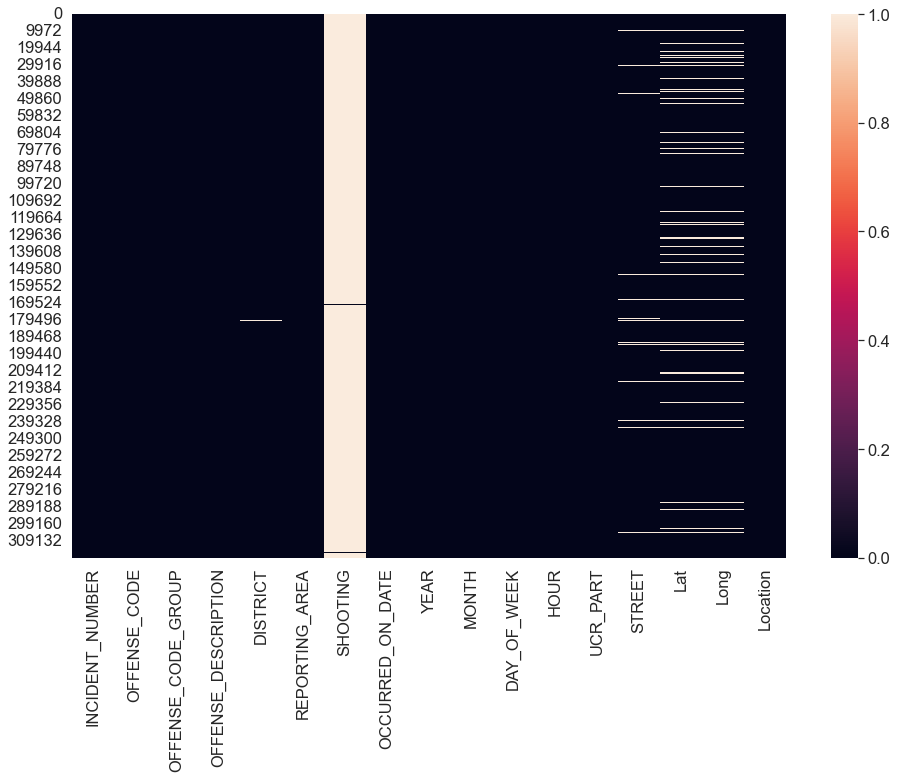

In [370]:
# Sebaran missing value di dalam data
plt.figure(figsize=(16, 10))
sns.heatmap(df_new[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']].isnull())
plt.show()

In [371]:
# Cek tipe data pada tiap kolom
df_new.dtypes

INCIDENT_NUMBER        object 
OFFENSE_CODE           int64  
OFFENSE_CODE_GROUP     object 
OFFENSE_DESCRIPTION    object 
DISTRICT               object 
REPORTING_AREA         object 
SHOOTING               object 
OCCURRED_ON_DATE       object 
YEAR                   int64  
MONTH                  int64  
DAY_OF_WEEK            object 
HOUR                   int64  
UCR_PART               object 
STREET                 object 
Lat                    float64
Long                   float64
Location               object 
dtype: object

Dari data diatas diketahui bahwa:
- Missing value di kolom `SHOOTING` tertinggi yaitu > 99%, sedangkan pada kolom `STREET` missing value sebesar 3.4% dan terakhir missing value terdapat dikolom `UCR_PART` dengan nilai 0.55%.
- Missing value pada kolom `Lat` dan `Long` memiliki nilai yang sama yaitu 6.26% dan dapat disimpulkan bahwa kedua kolom tersebut berkaitan. Apabila kolom `Lat` kosong, maka kolom `Long` juga kosong. Kedua kolom `Lat` dan `Long` saling berkaitan dengan kolom `Location`, dimana pada kolom `LOCATION` berisi data lat dan long.<br>

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam menangani data pada kolom (`SHOOTING`) dikarenakan memiliki jumlah missing value yang tergolong cukup tinggi (sampai 99%).
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median*, *modus*, ataupun data yang sesuai. Sedangkan menghapus data akan menjadi opsi terakhir.

Terdapat 318054 data (99%) data kosong pada kolom `SHOOTING`, sebelumnya kita cek dahulu jenis data apa saja yang kosong tersebut.

In [372]:
df_new['SHOOTING'].isnull().sum()

318054

In [373]:
# Menampilkan data kosong pada kolom SHOOTING
shooting_kosong = df_new[df_new['SHOOTING'].isnull()]
shooting_kosong

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [374]:
shooting_kosong.sort_values(by= 'OFFENSE_DESCRIPTION')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318744,I152030570-00,404,Aggravated Assault,"A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",E13,303,NaN,2016-10-29 08:25:00,2016,10,Saturday,8,Part One,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318885,I142020701-00,803,Simple Assault,A&B ON POLICE OFFICER,C11,337,NaN,2015-10-14 01:00:00,2015,10,Wednesday,1,Part Two,COLUMBIA RD,42.306451,-71.077304,"(42.30645148, -71.07730382)"
318842,I142042232-00,803,Simple Assault,A&B ON POLICE OFFICER,A1,64,NaN,2016-02-04 15:00:00,2016,2,Thursday,15,Part Two,PARKMAN ST,42.362184,-71.067442,"(42.36218370, -71.06744204)"
318766,I152019928-00,803,Simple Assault,A&B ON POLICE OFFICER,B2,153,NaN,2017-03-08 21:34:00,2017,3,Wednesday,21,Part Two,PEMBROKE ST,42.342528,-71.076789,"(42.34252789, -71.07678918)"
235641,I162032721,2611,Other,ABDUCTION - INTICING,B2,,NaN,2016-04-26 18:00:00,2016,4,Tuesday,18,Part Two,BURKSHIRE ST,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251947,I162015194,1504,Other,WEAPON - OTHER - OTHER VIOLATION,B2,298,NaN,2016-02-26 11:30:00,2016,2,Friday,11,Part Two,ROCKLAND ST,42.322680,-71.085483,"(42.32268030, -71.08548310)"
5082,I182065339,1504,Other,WEAPON - OTHER - OTHER VIOLATION,C11,359,NaN,2018-08-16 10:24:00,2018,8,Thursday,10,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"
28102,I182040663,1504,Other,WEAPON - OTHER - OTHER VIOLATION,B3,945,NaN,2018-05-27 13:52:00,2018,5,Sunday,13,Part Two,WESTVIEW ST,42.290732,-71.085282,"(42.29073239, -71.08528234)"
228666,I162040281,1504,Other,WEAPON - OTHER - OTHER VIOLATION,B2,184,NaN,2016-05-24 19:40:00,2016,5,Tuesday,19,Part Two,HUMPHREYS PL,42.319220,-71.067839,"(42.31922045, -71.06783906)"


In [375]:
# Cek jenis kejahatan apa saja yang memiliki missing value pada kolom SHOOTING
shooting_kosong['OFFENSE_DESCRIPTION'].unique()

array(['LARCENY ALL OTHERS', 'VANDALISM', 'TOWED MOTOR VEHICLE',
       'INVESTIGATE PROPERTY',
       'M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY', 'AUTO THEFT',
       'VERBAL DISPUTE', 'ROBBERY - STREET',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'THREATS TO DO BODILY HARM',
       'PROPERTY - LOST', 'SICK/INJURED/MEDICAL - PERSON',
       'DEMONSTRATIONS/RIOT', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'M/V ACCIDENT - OTHER', 'M/V ACCIDENT - PERSONAL INJURY',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY',
       'VIOL. OF RESTRAINING ORDER W NO ARREST',
       'VAL - VIOLATION OF AUTO LAW - OTHER',
       'VAL - OPERATING AFTER REV/SUSP.', 'HARASSMENT',
       'BALLISTICS EVIDENCE/FOUND', 'PROPERTY - FOUND',
       'LARCENY SHOPLIFTING', 'SERVICE TO OTHER PD INSIDE OF MA.',
       'FIRE REPORT/ALARM - FALSE',
       'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP', 'WARRANT ARREST',
       'DR

In [376]:
# Kolom SHOOTING yang memiliki data
ada_shooting = df_new[df_new['SHOOTING']== 'Y']
ada_shooting

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317370,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317371,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317567,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"


In [377]:
ada_shooting['OFFENSE_DESCRIPTION'].unique()

array(['ASSAULT - AGGRAVATED - BATTERY',
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER', 'BALLISTICS EVIDENCE/FOUND',
       'INVESTIGATE PROPERTY',
       'WEAPON - FIREARM - CARRYING / POSSESSING, ETC', 'WARRANT ARREST',
       'VANDALISM', 'DEATH INVESTIGATION', 'DRUGS - OTHER',
       'DRUGS - POSS CLASS D', 'WEAPON - FIREARM - OTHER VIOLATION',
       'INVESTIGATE PERSON', 'SEARCH WARRANT',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'ASSAULT - AGGRAVATED', 'WEAPON - OTHER - OTHER VIOLATION',
       'INTIMIDATING WITNESS', 'ROBBERY - CAR JACKING',
       'ROBBERY - STREET', 'ASSAULT SIMPLE - BATTERY',
       'DISORDERLY CONDUCT', 'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
       'DRUGS - POSS CLASS C - INTENT TO MFR DIST DISP',
       'ABDUCTION - INTICING', 'HOME INVASION',
       'VIOLATION - HAWKER AND PEDDLER', 'ROBBERY - OTHER',
       'DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP',
       'DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP', 'OTHER OFFENSE',
 

In [378]:
# Cek apakah data kosong karena tidak ada tembakan atau ada anomali data?
coba = df_new[df_new['OFFENSE_CODE_GROUP']== 'Homicide'].sort_values('SHOOTING')
coba

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
205561,I162065072,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,453,Y,2016-08-12 23:38:00,2016,8,Friday,23,Part One,ALGONQUIN ST,42.297795,-71.073842,"(42.29779501, -71.07384157)"
203447,I162067346,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,238,Y,2016-08-20 00:05:00,2016,8,Saturday,0,Part One,DUDLEY TER,42.318148,-71.067083,"(42.31814836, -71.06708346)"
201465,I162069471,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,344,Y,2016-08-27 01:39:00,2016,8,Saturday,1,Part One,WESTVILLE ST,42.300106,-71.071027,"(42.30010597, -71.07102710)"
201459,I162069476,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E13,634,Y,2016-08-27 03:33:00,2016,8,Saturday,3,Part One,CENTRE ST,42.320154,-71.111199,"(42.32015414, -71.11119859)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292881,I152078371,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A7,24,NaN,2015-09-20 10:30:00,2015,9,Sunday,10,Part One,TRENTON ST,42.378878,-71.036434,"(42.37887838, -71.03643423)"
312006,I152057348,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,402,NaN,2015-07-11 00:00:00,2015,7,Saturday,0,Part One,BAILEY ST,42.284666,-71.066022,"(42.28466568, -71.06602188)"
312521,I152056746,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E13,639,NaN,2015-07-02 16:30:00,2015,7,Thursday,16,Part One,ROBINWOOD AVE,42.316240,-71.112670,"(42.31624019, -71.11267011)"
312945,I152056250,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A1,112,NaN,2015-07-08 12:15:00,2015,7,Wednesday,12,Part One,CHAUNCY ST,42.352517,-71.061129,"(42.35251737, -71.06112927)"


Berdasarkan pengecekan diatas bahwa pada kolom jenis kejahatan, contoh: *Homicide* (OFFENSE_CODE_GROUP) dengan deskripsi kejahatan (MURDER, NON-NEGLIGIENT MANSLAUGHTER) ditemukan data Y dan ada juga data kosong. Ini berati data pada kolom shooting `Y` tidak tergantung dengan jenis kejahatan yang terjadi.
Oleh karena itu missing value pada kolom `SHOOTING` akan diisi *`No Shooting`* (`N`).

In [379]:
# data kosong pada shooting diisi N atau NO shooting
df_new['SHOOTING'].fillna('N', inplace= True)

In [380]:
# Cek missing value sudah tidak ada di kolom SHOOTING
# Missing value pada kolom SHOOTING sudah kosong
df_new.isnull().sum()

INCIDENT_NUMBER        0    
OFFENSE_CODE           0    
OFFENSE_CODE_GROUP     0    
OFFENSE_DESCRIPTION    0    
DISTRICT               1765 
REPORTING_AREA         0    
SHOOTING               0    
OCCURRED_ON_DATE       0    
YEAR                   0    
MONTH                  0    
DAY_OF_WEEK            0    
HOUR                   0    
UCR_PART               90   
STREET                 10871
Lat                    19999
Long                   19999
Location               0    
dtype: int64

In [381]:
# Cek data apakah sudah berubah menjadi N untuk missing value??
df_new[df_new['SHOOTING'] == 'N']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


Missing value pada kolom `UCR_PART` ada 90, namun kita cek terlebih dahulu data jenis kejahatan apa saja yang tidak diketahui UCR_PART nya?

In [382]:
df_new[df_new['UCR_PART'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1252,I182069560,2010,HOME INVASION,HOME INVASION,C6,915,N,2018-08-30 08:19:00,2018,8,Thursday,8,NaN,E NINTH ST,42.331463,-71.050126,"(42.33146325, -71.05012560)"
9214,I182060810,2010,HOME INVASION,HOME INVASION,E18,493,N,2018-08-01 14:52:00,2018,8,Wednesday,14,NaN,REDDY AVE,42.262855,-71.111811,"(42.26285498, -71.11181148)"
11592,I182058223,2010,HOME INVASION,HOME INVASION,A7,907,N,2018-07-24 05:23:00,2018,7,Tuesday,5,NaN,HAVRE ST,42.369912,-71.040926,"(42.36991243, -71.04092628)"
19577,I182049767,2010,HOME INVASION,HOME INVASION,B2,297,N,2018-06-25 16:37:00,2018,6,Monday,16,NaN,SAINT RICHARD ST,42.323190,-71.083564,"(42.32318974, -71.08356389)"
22316,I182046836,2010,HOME INVASION,HOME INVASION,C11,347,N,2018-06-16 02:31:00,2018,6,Saturday,2,NaN,LYON ST,42.306383,-71.060212,"(42.30638323, -71.06021218)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241806,I162026174,2010,HOME INVASION,HOME INVASION,B2,318,N,2016-04-04 22:00:00,2016,4,Monday,22,NaN,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)"
255412,I162011468,2010,HOME INVASION,HOME INVASION,B2,289,Y,2016-02-12 10:00:00,2016,2,Friday,10,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367922, -71.09187755)"
318753,I152026775-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,NaN,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318994,I130194606-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,D4,136,N,2016-02-02 19:30:00,2016,2,Tuesday,19,NaN,COMMONWEALTH AVE,42.351153,-71.081614,"(42.35115300, -71.08161374)"


In [383]:
# Cek jenis kejahatan yg datanya kosong

df_new[df_new['UCR_PART'].isnull()].value_counts('OFFENSE_CODE_GROUP')

OFFENSE_CODE_GROUP
HOME INVASION                                77
HUMAN TRAFFICKING                            7 
INVESTIGATE PERSON                           4 
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    2 
dtype: int64

In [384]:
# Cek jenis kejahatan apa saja yang dikategorikan sebagai Other
df_new[df_new['UCR_PART'] == 'Other'].value_counts('OFFENSE_CODE_GROUP')

OFFENSE_CODE_GROUP
Auto Theft Recovery                1051
Arson                              94  
License Plate Related Incidents    67  
Other                              10  
Manslaughter                       8   
Burglary - No Property Taken       2   
dtype: int64

Sesuai data pada artikel [FBI]('https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions) bahwa Arson dan Manslaughter masuk kedalam UCR *Part One*, sedangkan untuk data missing value akan dimasukan ke UCR_Part *Other* karena kategori kejahatan tidak ada di dalam artikel yang terlampir. Perubahan dataset akan disesuaikan seperti langkah dibawah.

In [385]:
# Merubah UCR_PART pada jenis kejahatan Manslaughter menjadi Part One
df_new.loc[df_new['OFFENSE_CODE_GROUP'] == "Manslaughter", 'UCR_PART'] = "Part One"

In [386]:
# Merubah UCR_PART pada jenis kejahatan Arson menjadi Part One
df_new.loc[df_new['OFFENSE_CODE_GROUP'] == "Arson", 'UCR_PART'] = "Part One"

In [387]:
# Cek untuk perubahannya
df_new[df_new['OFFENSE_CODE_GROUP'] == 'Arson']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
179,I182070739,900,Arson,ARSON,B3,446,N,2018-09-03 01:00:00,2018,9,Monday,1,Part One,NORWELL ST,42.298284,-71.078694,"(42.29828416, -71.07869447)"
4308,I182066191,900,Arson,ARSON,A15,900,N,2018-08-19 04:15:00,2018,8,Sunday,4,Part One,TUFTS ST,42.378773,-71.056779,"(42.37877257, -71.05677893)"
8697,I182061376,900,Arson,ARSON,B3,469,N,2018-08-03 10:41:00,2018,8,Friday,10,Part One,TENNIS RD,42.276157,-71.095503,"(42.27615691, -71.09550303)"
14308,I182055315,900,Arson,ARSON,A1,117,N,2018-07-14 00:12:00,2018,7,Saturday,0,Part One,WASHINGTON ST,42.351743,-71.062759,"(42.35174282, -71.06275940)"
17921,I182051500,900,Arson,ARSON,D4,143,N,2018-07-01 02:21:00,2018,7,Sunday,2,Part One,BOYLSTON ST,42.348624,-71.082776,"(42.34862382, -71.08277637)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291275,I152080110,900,Arson,ARSON,A1,77,N,2015-09-26 01:59:00,2015,9,Saturday,1,Part One,CONGRESS ST,42.361394,-71.057687,"(42.36139413, -71.05768690)"
291856,I152079485,900,Arson,ARSON,A7,22,N,2015-09-24 08:12:00,2015,9,Thursday,8,Part One,PARIS ST,42.375777,-71.033694,"(42.37577723, -71.03369448)"
292669,I152078595,900,Arson,ARSON,D4,146,N,2015-09-21 12:59:00,2015,9,Monday,12,Part One,HUNTINGTON AVE,42.347310,-71.079152,"(42.34730980, -71.07915167)"
300685,I152069846,900,Arson,ARSON,E5,741,N,2015-08-22 17:30:00,2015,8,Saturday,17,Part One,GLENHAM ST,42.288296,-71.170198,"(42.28829613, -71.17019781)"


In [388]:
df_new['UCR_PART'].nunique()

4

In [389]:
df_new[df_new['OFFENSE_CODE_GROUP'] == 'Other'].value_counts('OFFENSE_DESCRIPTION')

OFFENSE_DESCRIPTION
THREATS TO DO BODILY HARM                         9042
TRESPASSING                                       3254
VAL - VIOLATION OF AUTO LAW - OTHER               2894
OTHER OFFENSE                                     644 
VIOLATION - CITY ORDINANCE                        370 
INTIMIDATING WITNESS                              309 
DANGEROUS OR HAZARDOUS CONDITION                  307 
POSSESSION OF BURGLARIOUS TOOLS                   227 
INVESTIGATION FOR ANOTHER AGENCY                  194 
EXTORTION OR BLACKMAIL                            188 
REPORT AFFECTING OTHER DEPTS.                     166 
WEAPON - OTHER - OTHER VIOLATION                  147 
OBSCENE MATERIALS - PORNOGRAPHY                   80  
ANIMAL ABUSE                                      64  
VIOLATION - CITY ORDINANCE CONSTRUCTION PERMIT    51  
KIDNAPPING/CUSTODIAL KIDNAPPING                   48  
KIDNAPPING - ENTICING OR ATTEMPTED                44  
VIOLATION - HAWKER AND PEDDLER               

In [390]:
df_new['UCR_PART'].isnull().value_counts()

False    318983
True     90    
Name: UCR_PART, dtype: int64

In [391]:
# Isi missing value dengan Other
df_new['UCR_PART'].fillna('Other', inplace= True)

In [392]:
# Missing value pada kolom UCR_PART sudah kosong
df_new.isnull().sum()

INCIDENT_NUMBER        0    
OFFENSE_CODE           0    
OFFENSE_CODE_GROUP     0    
OFFENSE_DESCRIPTION    0    
DISTRICT               1765 
REPORTING_AREA         0    
SHOOTING               0    
OCCURRED_ON_DATE       0    
YEAR                   0    
MONTH                  0    
DAY_OF_WEEK            0    
HOUR                   0    
UCR_PART               0    
STREET                 10871
Lat                    19999
Long                   19999
Location               0    
dtype: int64

Missing value pada kolom `DISTRICT` terdapat 1765 sekitar 0.55%, untuk missing value ini kita akan drop agar meminimalisir kesalahan mengingat ada beberapa kolom yang berhubungan juga memiliki missing value jadi kita tidak bisa melihat referensi keakuratan datanya apabila diisi.
Hal ini juga akan dilakukan untuk missing value pada kolom `STREET` yang memiliki 3.4%.

In [393]:
# Proporsi data kosong pada kolom DISTRICT dan STREET
df_new[['DISTRICT', 'STREET']].isnull().sum()/df_new.shape[0]*100

DISTRICT    0.553165
STREET      3.407057
dtype: float64

In [394]:
df_new.dropna(subset= ['DISTRICT', 'STREET'], inplace= True)

Missing value pada kolom `Lat` dan `Long` pada kedua kolom ini sama yaitu sebesar 3.9% dikarenakan kita tidak punya acuan untuk mengisi Lat dan Loc, maka untuk menangani masalah ini adalah kita hapus data kosong pada kolom ini. Ini merupakan cara yang cukup dianggap sesuai untuk menangani masalah ini.

In [395]:
# Proporsi data kosong pada kolom Lat dan Long
df_new[['Lat', 'Long']].isnull().sum()/df_new.shape[0]*100

Lat     3.519208
Long    3.519208
dtype: float64

In [396]:
df_new.dropna(subset= ['Lat', 'Long'], inplace= True)

In [397]:
# Cek missing value
# Sudah tidak ada missing value pada data
df_new.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

Berdasarkan pengecekan sebelumnya bahwa kolom `INCIDENT_NUMBER` memiliki data duplikat dimana perbedaan terdapat pada kejahatan yang dilakukan yaitu pada kolom OFFENSE_CODE_GROUP dan OFFENSE_DESCRIPTION, namun waktu (kolom OCCURED_ON_DATE) kejadian sama atau bebarengan dan juga tempat serta area pelaporan kejadian sama (kolom DISTRICT dan REPORTING_AREA).<br> 
Dalam hal ini kita akan drop data duplikat tersebut dikarenakan INCIDENT_NUMBER untuk tiap kejahatan berbeda, karena itu merupakan kode unik untuk mengidentifikasi.

In [398]:
# drop duplikat data pada kolom INCIDENT_NUMBER
df_new.drop_duplicates(subset= 'INCIDENT_NUMBER', inplace= True)

In [399]:
df_new['INCIDENT_NUMBER'].value_counts()

I182070945    1
I162056188    1
I162056134    1
I162056132    1
I162056131    1
             ..
I172064578    1
I172064577    1
I172064576    1
I172064575    1
142052550     1
Name: INCIDENT_NUMBER, Length: 263241, dtype: int64

In [400]:
df_new.dtypes

INCIDENT_NUMBER        object 
OFFENSE_CODE           int64  
OFFENSE_CODE_GROUP     object 
OFFENSE_DESCRIPTION    object 
DISTRICT               object 
REPORTING_AREA         object 
SHOOTING               object 
OCCURRED_ON_DATE       object 
YEAR                   int64  
MONTH                  int64  
DAY_OF_WEEK            object 
HOUR                   int64  
UCR_PART               object 
STREET                 object 
Lat                    float64
Long                   float64
Location               object 
dtype: object

Selanjutnya kita ubah tipe data pada kolom OCCURED_ON_DATE dari object menjadi datetime

In [401]:
df_new['OCCURRED_ON_DATE'] = pd.to_datetime(df_new['OCCURRED_ON_DATE'])

In [402]:
df_new.dtypes

INCIDENT_NUMBER        object        
OFFENSE_CODE           int64         
OFFENSE_CODE_GROUP     object        
OFFENSE_DESCRIPTION    object        
DISTRICT               object        
REPORTING_AREA         object        
SHOOTING               object        
OCCURRED_ON_DATE       datetime64[ns]
YEAR                   int64         
MONTH                  int64         
DAY_OF_WEEK            object        
HOUR                   int64         
UCR_PART               object        
STREET                 object        
Lat                    float64       
Long                   float64       
Location               object        
dtype: object

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [403]:
listItem = []
for col in df_new.columns :
    listItem.append([col, df_new[col].dtype, df_new[col].isna().sum(),
                    df_new[col].nunique(), list(df_new[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_new.shape)
dfDesc


(263241, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,INCIDENT_NUMBER,object,0,263241,"[I172096628, I172092372]"
1,OFFENSE_CODE,int64,0,202,"[1105, 1805]"
2,OFFENSE_CODE_GROUP,object,0,67,"[Vandalism, Property Lost]"
3,OFFENSE_DESCRIPTION,object,0,210,"[ABDUCTION - INTICING, ROBBERY - OTHER]"
4,DISTRICT,object,0,12,"[B2, B3]"
5,REPORTING_AREA,object,0,879,"[803, 653]"
6,SHOOTING,object,0,2,"[N, Y]"
7,OCCURRED_ON_DATE,datetime64[ns],0,218599,"[2018-08-28T22:42:00.000000000, 2015-09-10T19:10:00.000000000]"
8,YEAR,int64,0,4,"[2017, 2015]"
9,MONTH,int64,0,12,"[7, 9]"


Sekarang kita memiliki 263241, untuk missing value sebelumnya sudah dihapus dan ada juga yang telah diisi oleh data yang dianggap sesuai.

## Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana cara agar BPD dapat mengurangi tindak kriminal berdasarkan history kejahatan sebelumnya?**. Kita harus menganalisa dan menjawab pertanyaan dari rumusan masalah yang sebelumnya sudah kita buat.<br>
Analisa yang kita lakukan adalah membandingkan data antar kolom sehingga mendapatkan jawaban dari rumusan masalah yang telah kita buat. Kita akan menggunakan metode statistika deskriptif.

### Berdasarkan nomor kejadian:  `INCIDENT_NUMBER`, `OCCURED_CODE_GROUP`, `OCCURED_ON_DATE`, `YEAR`, and `MONTH`

Pertama kita lihat ada berapa banyak kejahatan yang terjadi tiap tahunnya, ini akan menjawab pertanyaan: `Kapan tindak kejahatan paling banyak terjadi?`


In [404]:
# Cek total kejahatan yang terjadi tiap tahunnya

crime_year = df_new['YEAR'].value_counts()
print(crime_year)

2017    82684
2016    81421
2018    54049
2015    45087
Name: YEAR, dtype: int64


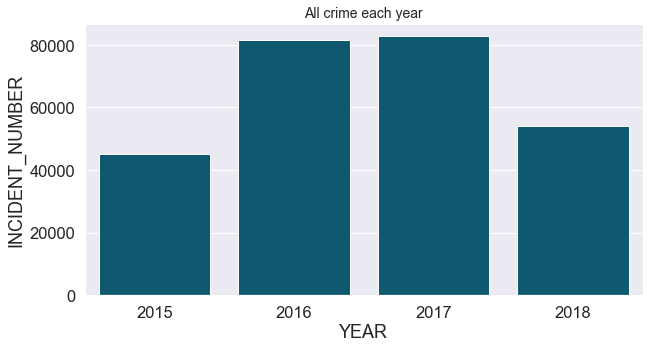

In [405]:
year_counts = df_new.groupby('YEAR').count()['INCIDENT_NUMBER'].to_frame().reset_index()
pal = sns.color_palette("GnBu_d", len(year_counts['YEAR']))
plt.figure(figsize= (10,5))

ax = sns.barplot(x = 'YEAR' , y= 'INCIDENT_NUMBER', data = year_counts, color= '#006080')
plt.title('All crime each year', fontsize= 14)

plt.show()

In [406]:
# Mencari 10 jenis kejahatan yang paling banyak terjadi selama 4 tahun (2015 - 2018)

df_ct = pd.crosstab(df_new['OFFENSE_CODE_GROUP'], df_new['YEAR'])
df_ct['Total Kejahatan'] = df_ct.sum(axis=1)
df_ct.sort_values('Total Kejahatan', ascending=False).head(10)

YEAR,2015,2016,2017,2018,Total Kejahatan
OFFENSE_CODE_GROUP,,,,,
Motor Vehicle Accident Response,5040,8928,9185,5880,29033
Larceny,4628,7187,7101,4714,23630
Medical Assistance,2996,6484,7193,5214,21887
Investigate Person,2318,5309,6112,3520,17259
Other,2511,4091,3823,2823,13248
Vandalism,2393,4370,4088,2321,13172
Simple Assault,2120,3902,3869,2879,12770
Verbal Disputes,1446,3915,4204,2863,12428
Towed,1490,2929,3597,2301,10317


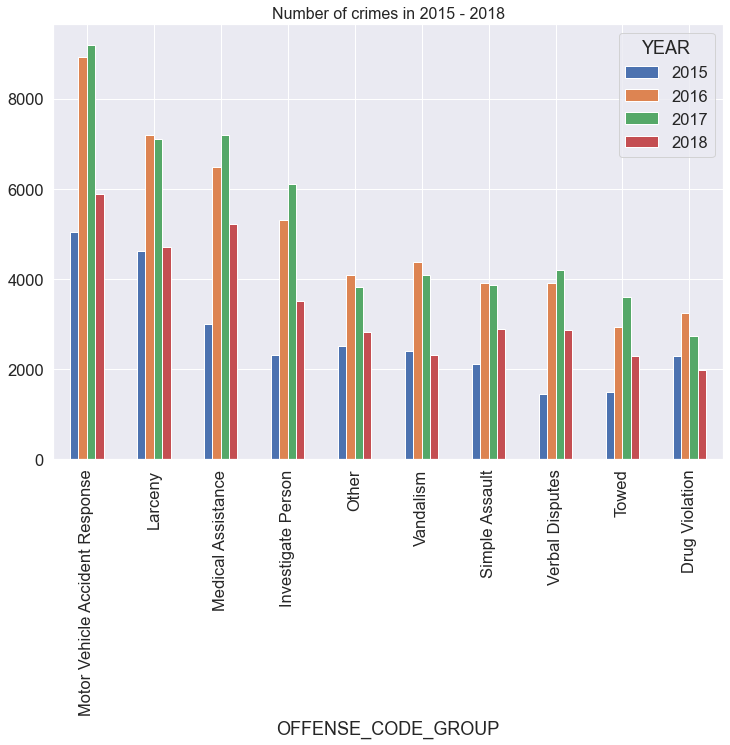

In [407]:
df_ct.sort_values('Total Kejahatan', ascending=False).head(10).drop(columns='Total Kejahatan').plot(kind='bar',figsize=(12,8)) 
plt.title('Number of crimes in 2015 - 2018', fontsize= 16)
plt.show()

> Dari visualisasi diatas dapat disimpulkan bahwa kasus kejahatan paling tinggi adalah di 2017 dengan jenis kejahatannya yaitu Motor Vehicle Accident Response. Jenis kejahatan ini juga merupakan jenis kejahatan yang paling sering terjadi tiap tahunnya.

Selanjutnya kita cek frekuensi terjadinya kejahatan untuk tiap bulannya.

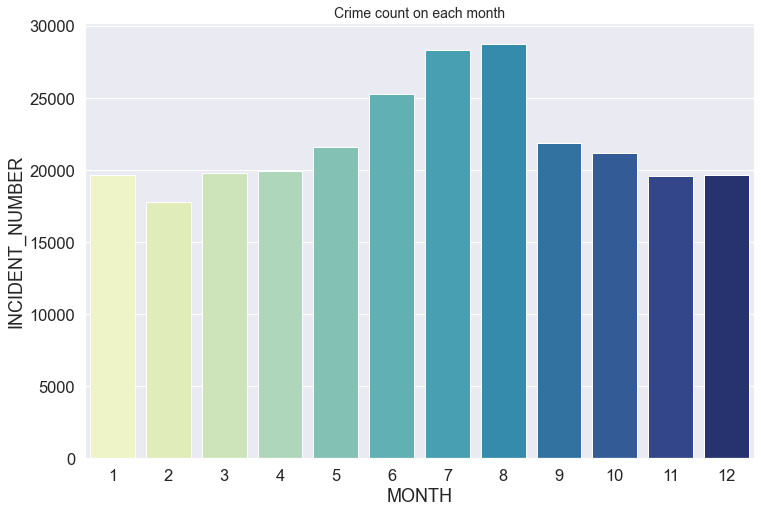

In [408]:
# Cek frekuensi kejahatan tiap bulan
plt.figure(figsize= (12,8))
month_counts = df_new.groupby('MONTH').count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'MONTH' , y="INCIDENT_NUMBER", data = month_counts, palette='YlGnBu')
plt.title('Crime count on each month', fontsize= 14)
plt.show()


In [409]:
crime_days = df_new.groupby('DAY_OF_WEEK').agg('count')
day_counts = crime_days['OFFENSE_CODE_GROUP']
day_counts

DAY_OF_WEEK
Friday       39971
Monday       37841
Saturday     36830
Sunday       33605
Thursday     38317
Tuesday      38144
Wednesday    38533
Name: OFFENSE_CODE_GROUP, dtype: int64

In [410]:
# Visualisasi crime for each day

Number_crimes_day = df_new['DAY_OF_WEEK'].value_counts()
days = pd.DataFrame(data= Number_crimes_day.index, columns=["DAY_OF_WEEK"])
days['values'] = Number_crimes_day.values

plt.figure(figsize= (12,8))
fig = px.pie(days, values='values', names='DAY_OF_WEEK')
fig.show()

<Figure size 864x576 with 0 Axes>

In [411]:
# Cek frekuensi kejahatan tiap HOUR nya

crime_hour = df_new.groupby('HOUR').agg('count')
hour_counts = crime_hour['INCIDENT_NUMBER']
hour_counts.sort_values(ascending= False)

HOUR
17    16585
16    16405
18    16295
12    15822
19    14456
14    14277
13    14022
10    13842
15    13777
11    13756
20    13248
9     12627
0     12290
21    11824
8     10993
22    10663
23    8758 
7     7580 
1     6992 
2     5862 
6     4143 
3     3613 
5     2715 
4     2696 
Name: INCIDENT_NUMBER, dtype: int64

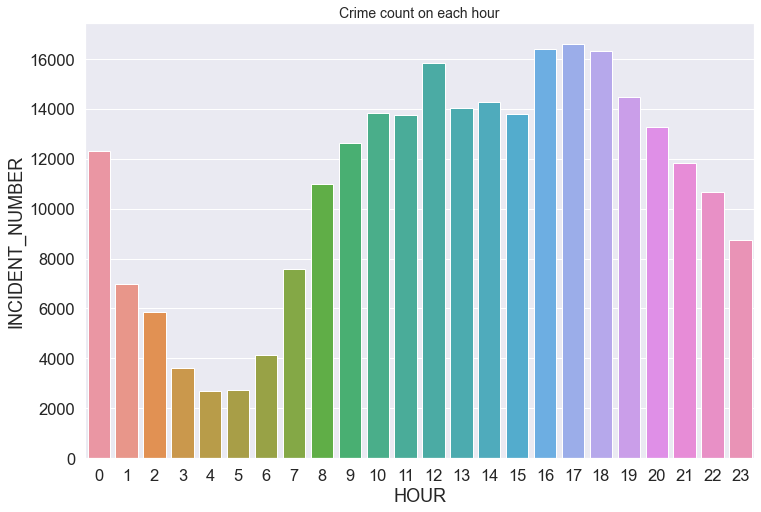

In [412]:
# Cek frekuensi kejahatan tiap HOUR

plt.figure(figsize= (12,8))
hour_counts = df_new.groupby('HOUR').count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'HOUR' , y="INCIDENT_NUMBER", data = hour_counts)
plt.title('Crime count on each hour', fontsize= 14)
plt.show()

In [413]:
max_year_crime = df_new['YEAR'].value_counts().index[0]
max_hour_crime = df_new['HOUR'].value_counts().index[0]
max_month_crime = df_new['MONTH'].value_counts().index[0]
max_day_crime = df_new['DAY_OF_WEEK'].value_counts().index[0]

month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

print('Year with highest crime occurrence:', max_year_crime)
print('Hour with highest crime occurrence:', max_hour_crime)
print('Month with highest crime occurrence:', month[max_month_crime-1], max_month_crime)
print('Day with highest crime occurrence:', max_day_crime)

Year with highest crime occurrence: 2017
Hour with highest crime occurrence: 17
Month with highest crime occurrence: August 8
Day with highest crime occurrence: Friday


Dari analisa diatas diketahui bahwa 2017 adalah tahun dengan kejahatan kasus kejahatan tertinggi dan bulan Agustus adalah bulan dengan banyak kasus kejahatan. Sedangkan dari sisi hari, Jumat adalah hari dengan dengan kasus kejahatan tertinggi kemudian untuk waktu terjadinya tertinggi adalah di jam 17.00-18.00.

## Berdasarkan tempat kejadian:  `INCIDENT_NUMBER`, `DISTRICT`, `STREET`

Kita akan melihat dimana kejahatan sering terjadi dalam rentar waktu 2015 - 2018 dan ini akan menjawab pertanyaan: `Dimana tindak kejahatan paling banyak terjadi?`

In [414]:
crime_district = df_new.groupby('DISTRICT').agg('count')
district_counts = crime_district['INCIDENT_NUMBER']
district_counts.sort_values(ascending= False)

DISTRICT
B2     40122
C11    35821
D4     33581
B3     29673
A1     27860
C6     19620
D14    17653
E18    15120
E13    14764
A7     11854
E5     11498
A15    5675 
Name: INCIDENT_NUMBER, dtype: int64

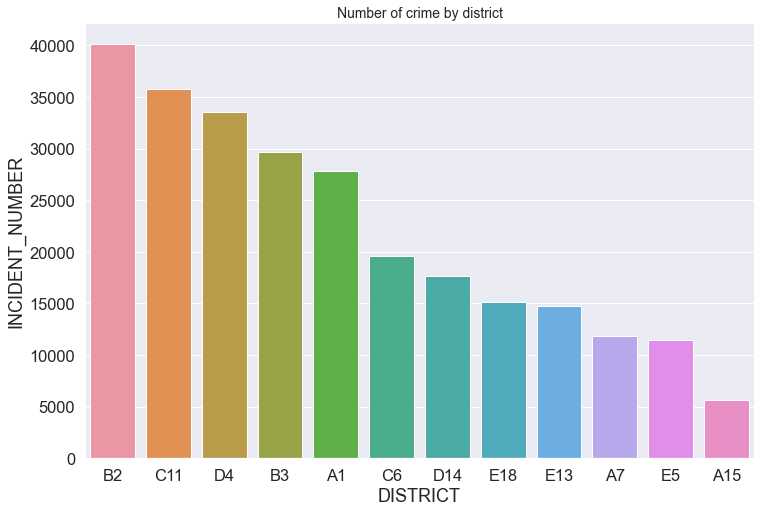

In [415]:
# Cek frekuensi kejahatan untuk tiap District

district_nums =  df_new.groupby('DISTRICT').count()['INCIDENT_NUMBER'].sort_values(ascending = False).to_frame().reset_index()
plt.figure(figsize= (12,8))
pal = sns.color_palette("ch:3.4,-.2,dark=.2", len(district_nums['DISTRICT']))
ax = sns.barplot(x = 'DISTRICT' , y="INCIDENT_NUMBER", data = district_nums)
plt.title('Number of crime by district', fontsize= 14)
plt.show()

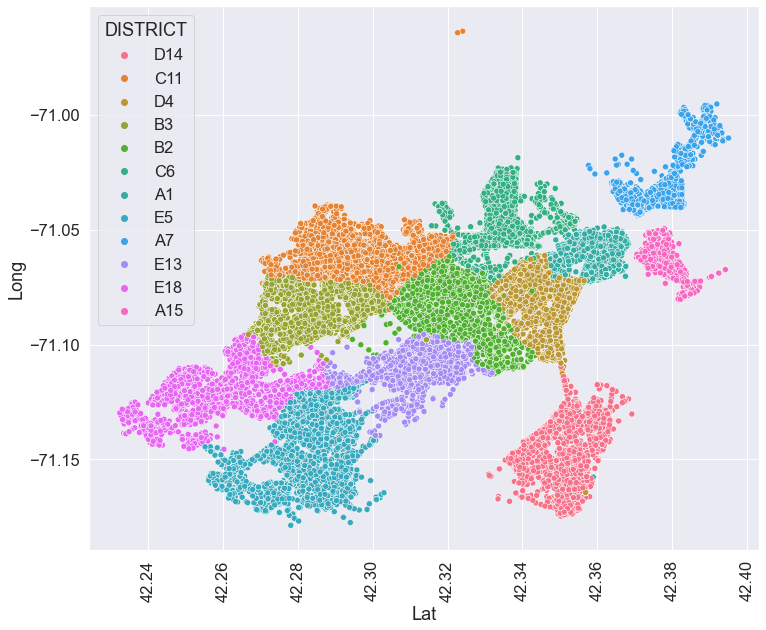

In [416]:
# Cek persebaran kejahatan per District engan scatterplot by Lat dan Long

plt.figure(figsize=(12, 10))
sp = df_new[(df_new['Lat'] != -1) & (df_new['Long'] != -1)]
sns.scatterplot(x="Lat", y="Long", hue='DISTRICT',data=sp)
plt.xticks(rotation=90)
plt.show()

In [417]:
# Crime by street

crime_district = df_new.groupby('STREET').agg('count')
district_counts = crime_district['INCIDENT_NUMBER']
district_counts.sort_values(ascending= False).head(10)

STREET
WASHINGTON ST        12265
BLUE HILL AVE        6150 
BOYLSTON ST          5896 
DORCHESTER AVE       4317 
TREMONT ST           4047 
CENTRE ST            3794 
MASSACHUSETTS AVE    3656 
COMMONWEALTH AVE     3612 
HARRISON AVE         3433 
HYDE PARK AVE        3124 
Name: INCIDENT_NUMBER, dtype: int64

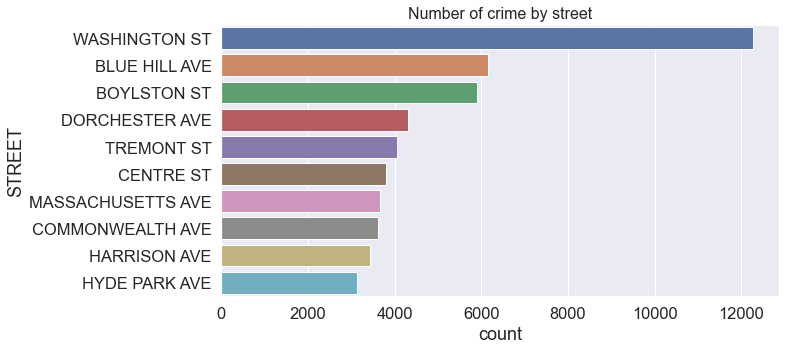

In [418]:
# Cek kasus kejahatan tertinggi by street

order_street = df_new['STREET'].value_counts().head(10).index

plt.figure(figsize= (10,5))
sns.countplot(data = df_new, y='STREET', order = order_street)
plt.title('Number of crime by street', fontsize= 16)
plt.show()

In [419]:
max_street_crime = df_new['STREET'].value_counts().index[0]
max_district_crime = df_new['DISTRICT'].value_counts().index[0]

print('Street with higher occurrence of crimes:', max_street_crime)
print('District with higher occurrence of crimes:', max_district_crime)

Street with higher occurrence of crimes: WASHINGTON ST
District with higher occurrence of crimes: B2


Dari analisa diatas diketahui bahwa kejahatan sering terjadi di Washington ST dan District B2.

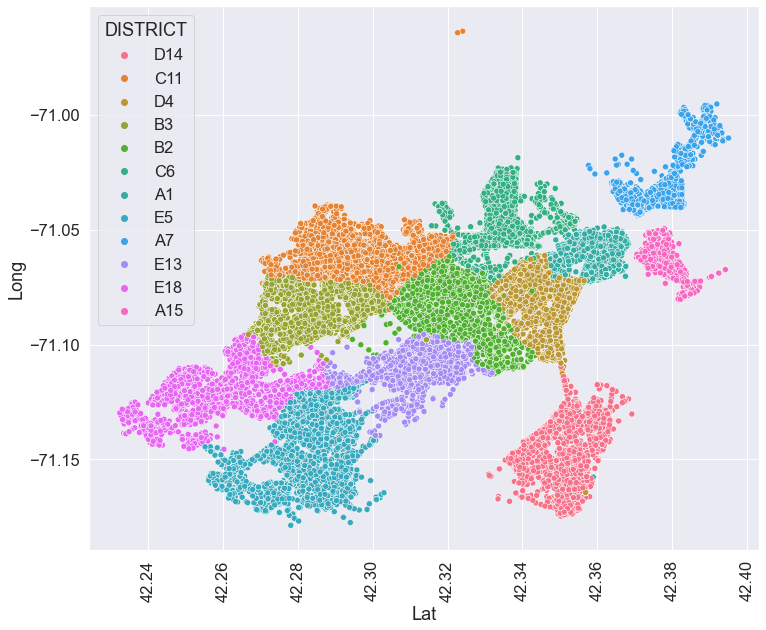

In [420]:
plt.figure(figsize=(12, 10))
sp = df_new[(df_new['Lat'] != -1) & (df_new['Long'] != -1)]
sns.scatterplot(x="Lat", y="Long", hue='DISTRICT',data=sp)
plt.xticks(rotation=90)
plt.show()

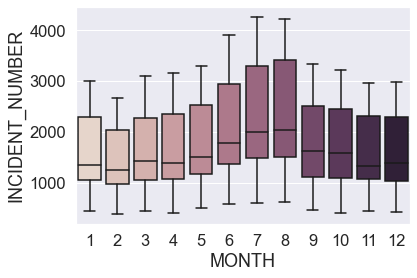

In [421]:
# Menampilkan kejahatan untuk tiap district per bulannya (dilihat dari kategori/jenis kejahatannya INCIDENT_NUMBER)

grouped = df_new.groupby(['MONTH','DISTRICT']).count()
sns.boxplot(x ="MONTH", y = "INCIDENT_NUMBER", data = grouped.reset_index(), palette="ch:.102")
plt.show()

## Berdasarkan jenis kejahatan:  `OFFENSE_CODE_GROUP`, `DISTRICT`, `YEAR`, `MONTH`

Kita akan melihat jenis kejahatan apa saja yang sering terjadi dalam rentan waktu 2015 - 2018 dan ini akan menjawab pertanyaan: `Jenis kejahatan apa yang paling banyak terjadi?`

In [422]:
group_offense_code = df_new.groupby('OFFENSE_CODE_GROUP').agg('count')
top_offense_code = group_offense_code['INCIDENT_NUMBER']
top_offense_code.sort_values(ascending= False).head(10)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    29033
Larceny                            23630
Medical Assistance                 21887
Investigate Person                 17259
Other                              13248
Vandalism                          13172
Simple Assault                     12770
Verbal Disputes                    12428
Towed                              10317
Drug Violation                     10243
Name: INCIDENT_NUMBER, dtype: int64

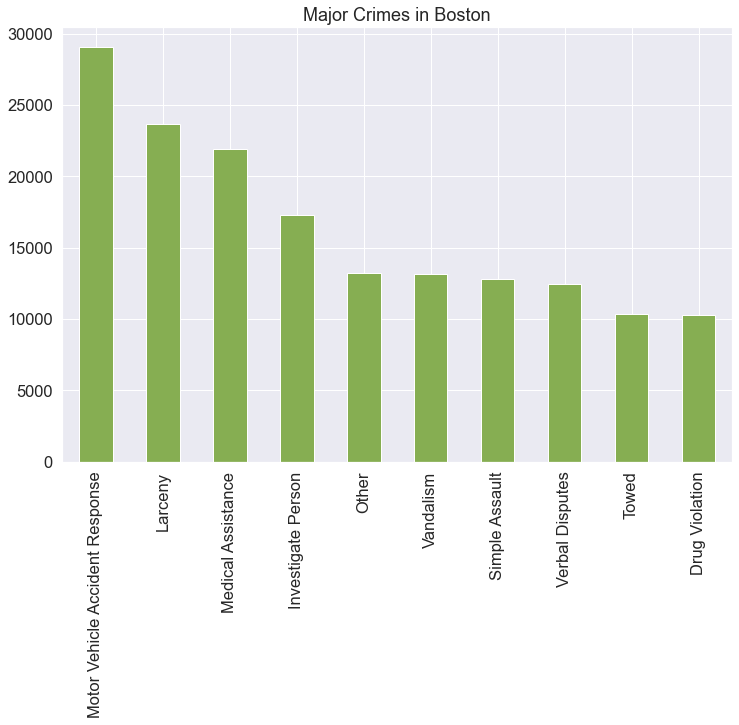

In [423]:
# Cek kejahatan yang paling banyak terjadi 

plt.figure(figsize=(12,8))
x = df_new['OFFENSE_CODE_GROUP'].value_counts().head(10).plot(kind='bar', color = '#86ae52')
plt.title('Major Crimes in Boston')
plt.show()

In [424]:
# Cek tipe kejahatan apa saja yang untuk tiap DISTRICT

df_d =  df_new.groupby(['DISTRICT', 'OFFENSE_CODE_GROUP']).count()['INCIDENT_NUMBER'].sort_values(ascending = False).to_frame().reset_index()

fig = px.histogram(df_d, x='DISTRICT', y='INCIDENT_NUMBER',color='OFFENSE_CODE_GROUP')
plt.figure(figsize= (18,8))
fig.show()

<Figure size 1296x576 with 0 Axes>

In [425]:
# Visualisasi total offense_code_group berdasarkan ucr_part

ucr_crime = df_new['UCR_PART'].value_counts()
ucr_crime2 = pd.DataFrame(data= ucr_crime.index, columns=["OFFENSE_CODE_GROUP"])
ucr_crime2['values'] = ucr_crime.values

fig = px.pie(ucr_crime2, values='values', names='OFFENSE_CODE_GROUP')
fig.show()



Dari analisa diatas diketahui bahwa Motor Vehicle Accident Response adalah kejahatan dengan kasus tertinggi, serta jenis kejahatan yang sering terjadi paling banyak adalah dengan kategori kejahatan UCR Part Three.

## Kesimpulan dan Rekomendasi

Dari analisa yang telah kita lakukan, kita dapat membuat kesimpulan sebagai berikut:<br>
- Dari data diketahui bahwa kita memiliki 263,241 kasus pelanggaran kejahatan dari rentan tahun 2015-2018. Pelanggaran ini memiliki *INCIDENT_NUMBER* yang berbeda untuk tiap kasusnya.
- Kejahatan paling banyak terjadi pada tahun 2017, namun dalam dalam 2015 dan 2018 kita tidak memiliki data yang lengkap karena data tidak dihitung selama 1 tahun full.
- Frekuensi terjadinya kejahatan paling tinggi yaitu pada bulan Agustus.
- Frekunsi tertinggi terjadinya kejahatan dari sisi waktu/jam paling tinggi yaitu jam 17.00, kemudian disusul dengan jam 16.00 dan 18.00 .
- Persebaran terjadinya kejahatan di Boston apabila dilihat dari sisi hari yaitu persebaran hampir rata antara dengan nilai 12 - 15%, namun tertinggi terjadi pada hari Jumat dengan 15.2%.
- Kasus kejahatan tertinggi terjadi di jalan Washington ST dengan district B2.
- Kasus kejahatan yang paling sering terjadi adalah Motor Vehicle Accident Response.
- Part Three adalah UCR dengan kasus paling banyak selama 2015 - 2018.

**Rekomendasi**

1. Anggota kepolisian harus lebih fokus dengan kejahatan Motor Vehicle Accident Response karena merupakan kejahatan dengan kasus tertinggi. Kemudian dapat fokus kepada kejahatan seperti 
Larceny, Medical Assistance, Investigate Person, Vandalism,  Simple Assault, Verbal Disputes, Towed, Drug, Violation.
2. Kepolisian harus lebih menambahkan personil terutama pada district B2.
3. Memberikan himbauan kepada masyarakat sekitar untuk lebih berhati-hati terutama pada jam rawan dari jam 16.00 sampai malam hari.
4. Lebih ketat dalam menjaga jalan Washington St.

Dengan analisis ini diharapkan dapat membatu mengurangi tindak kejahatan di Boston.